<a href="https://colab.research.google.com/github/dhivya4/Inceptz/blob/main/Mini_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns               
import matplotlib.pyplot as plt    
%matplotlib inline

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/dhivya4/Inceptz/main/train_ctrUa4K.csv")

In [4]:
test = pd.read_csv("https://raw.githubusercontent.com/dhivya4/Inceptz/main/test_lAUu6dG.csv")

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [8]:
test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP001015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367.0,NaN,NaN,NaN,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,NaN,NaN,NaN,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,NaN,NaN,NaN,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,NaN,NaN,NaN,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0


In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
train.shape , test.shape


((614, 13), (367, 12))

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

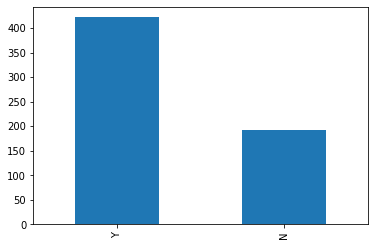

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

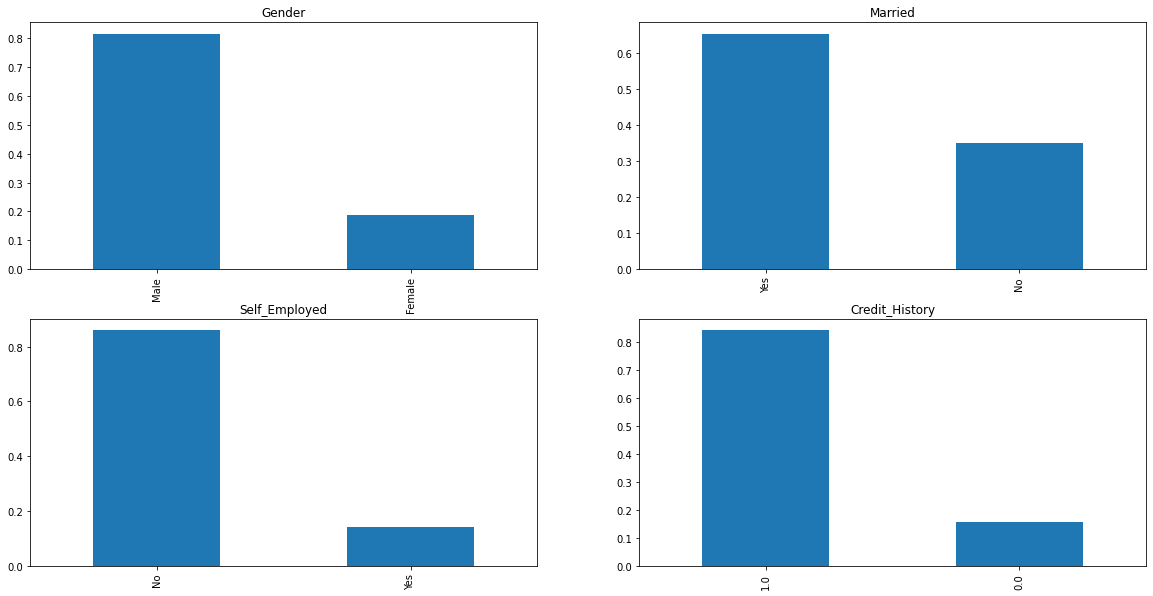

In [ ]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Gender') 
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed') 
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit_History') 
plt.show()

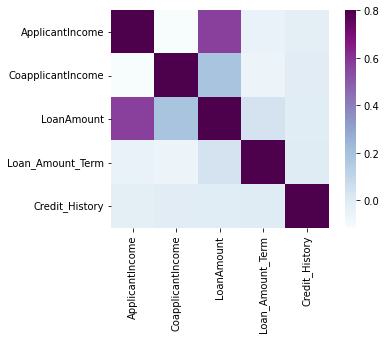

In [ ]:
matrix = train.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [10]:
pip install autoviz -U


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Loan_ID,614,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
ApplicantIncome,505,int64,0,0.000000,82.247557,0,
CoapplicantIncome,287,float64,0,0.000000,46.742671,0,highly skewed: drop outliers or do box-cox transform
LoanAmount,203,float64,22,3.583062,33.061889,0,"fill missing, skewed: cap or drop outliers"
Loan_Amount_Term,10,float64,14,2.280130,1.628664,0,"fill missing, skewed: cap or drop outliers"
Dependents,4,object,15,2.442997,0.651466,51,"fill missing, fix mixed data types"
Property_Area,3,object,0,0.000000,0.488599,179,
Gender,2,object,13,2.117264,0.325733,112,"fill missing, fix mixed data types"
Married,2,object,3,0.488599,0.325733,213,"fill missing, fix mixed data types"
Education,2,object,0,0.000000,0.325733,134,


  Printing upto 30 columns max in each category:
    Numeric Columns : ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    Integer-Categorical Columns: ['ApplicantIncome']
    String-Categorical Columns: ['Dependents', 'Property_Area']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Gender', 'Married', 'Education', 'Self_Employed']
    Numeric-Boolean Columns: ['Credit_History']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['Loan_ID']
    Columns that will not be considered in modeling: []
    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Loan_ID']

################ Binary_Classification problem #####################
Number of variables = 11 exceeds limit, finding top 10 variables through XGBoost
    No categorical feature reduction done. All 8 Categorical vars selected 
    Removing correlated variables from 3 num

,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
ApplicantIncome,505,int64,0,0.000000,82.247557,0,
CoapplicantIncome,287,float64,0,0.000000,46.742671,0,highly skewed: drop outliers or do box-cox transform
LoanAmount,203,float64,22,3.583062,33.061889,0,"fill missing, skewed: cap or drop outliers"
Loan_Amount_Term,10,float64,14,2.280130,1.628664,0,"fill missing, skewed: cap or drop outliers"
Dependents,4,object,15,2.442997,0.651466,51,"fill missing, fix mixed data types"
Gender,2,object,13,2.117264,0.325733,112,"fill missing, fix mixed data types"
Married,2,object,3,0.488599,0.325733,213,"fill missing, fix mixed data types"
Education,2,object,0,0.000000,0.325733,134,
Self_Employed,2,object,32,5.211726,0.325733,82,"fill missing, fix mixed data types"
Credit_History,2,float64,50,8.143322,0.325733,0,"fill missing, skewed: cap or drop outliers"


  Printing upto 30 columns max in each category:
    Numeric Columns : ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    Integer-Categorical Columns: ['ApplicantIncome']
    String-Categorical Columns: ['Dependents']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Gender', 'Married', 'Education', 'Self_Employed']
    Numeric-Boolean Columns: ['Credit_History']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    10 Predictors classified...
    No variables removed since no ID or low-information variables found in data
    List of variables removed: []
Total Number of Scatter Plots = 6
All Plots are saved in ./AutoViz_Plots/Loan_Status
Time to run AutoViz = 16 seconds 


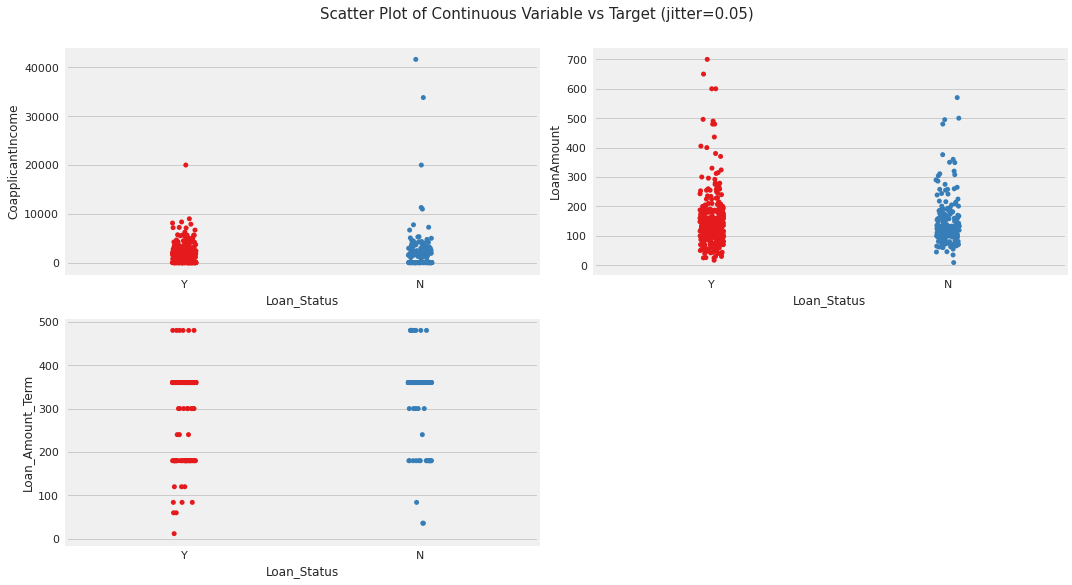

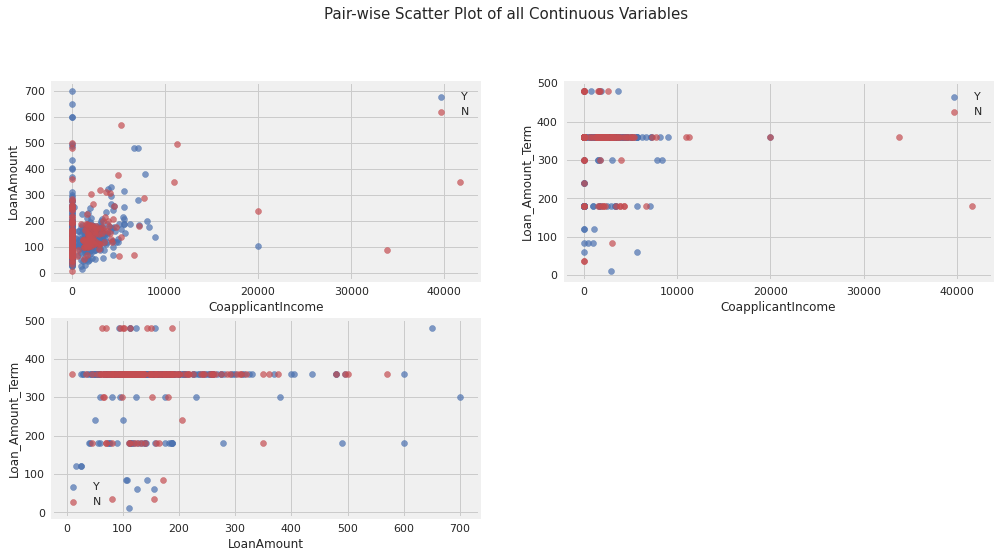

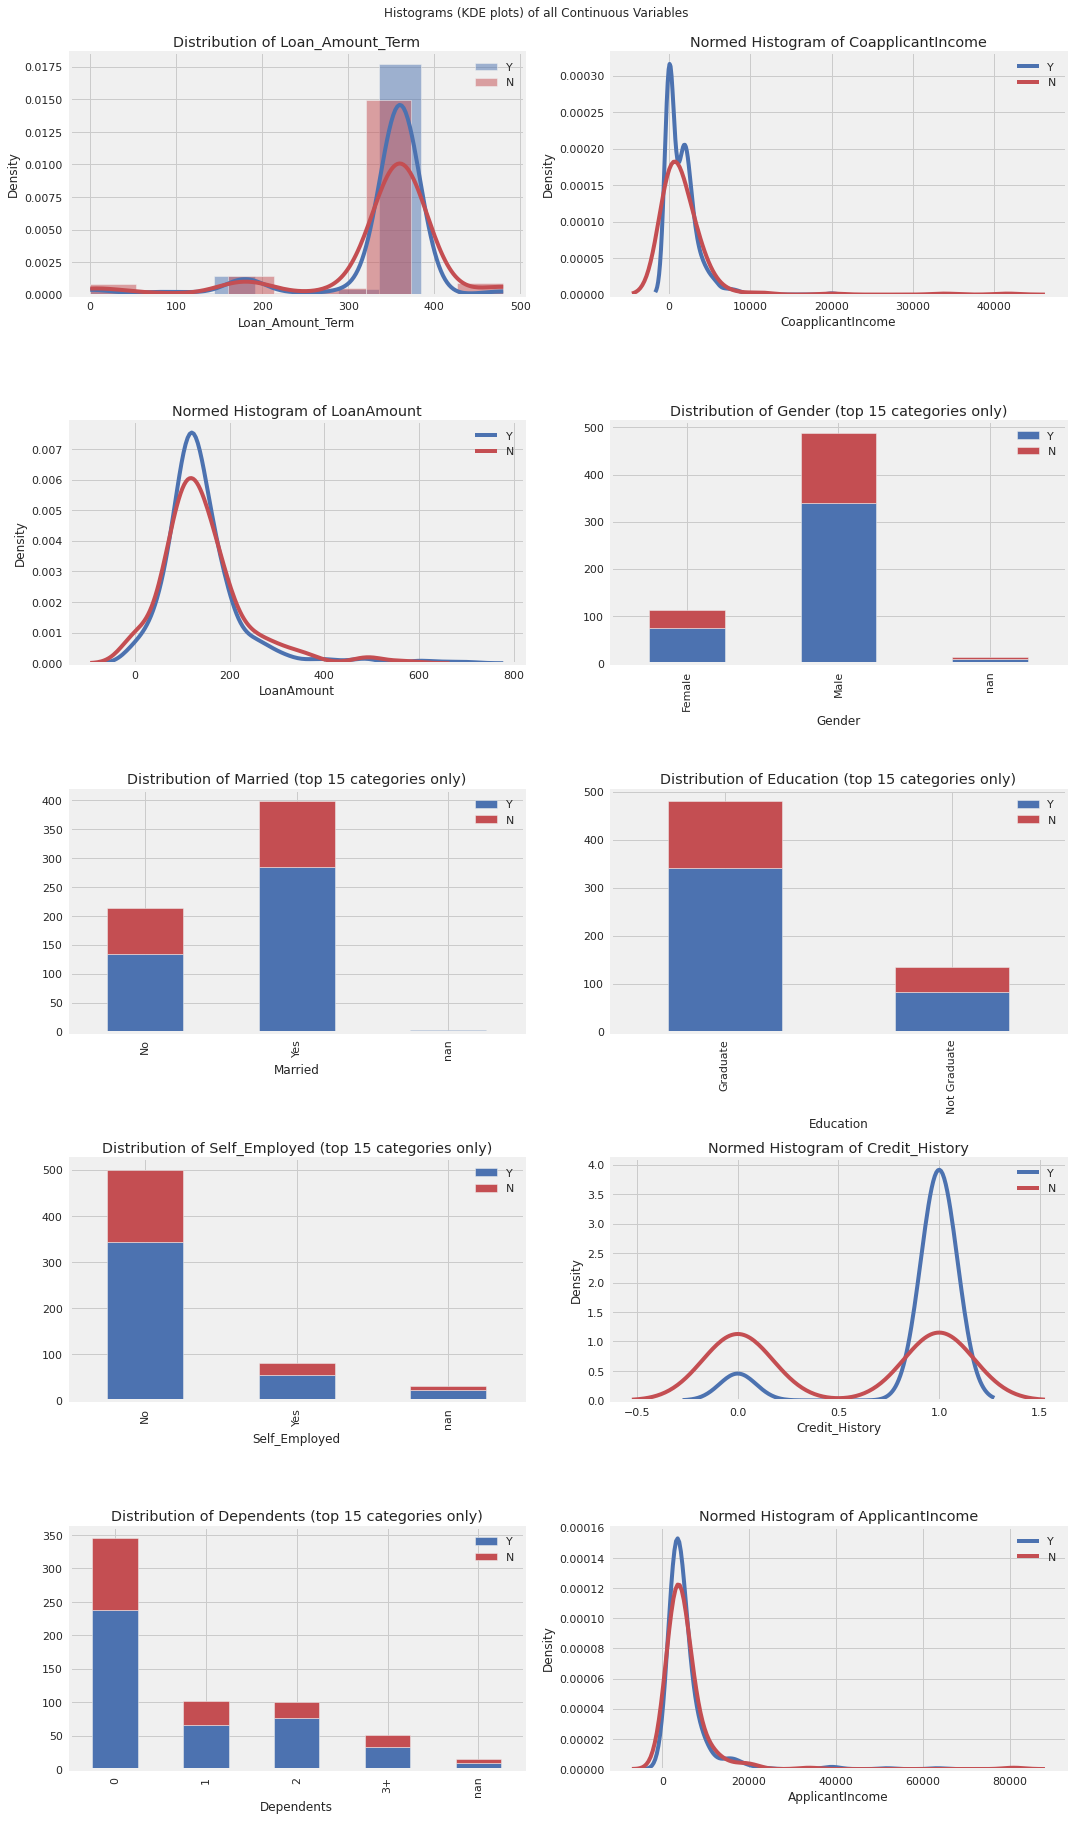

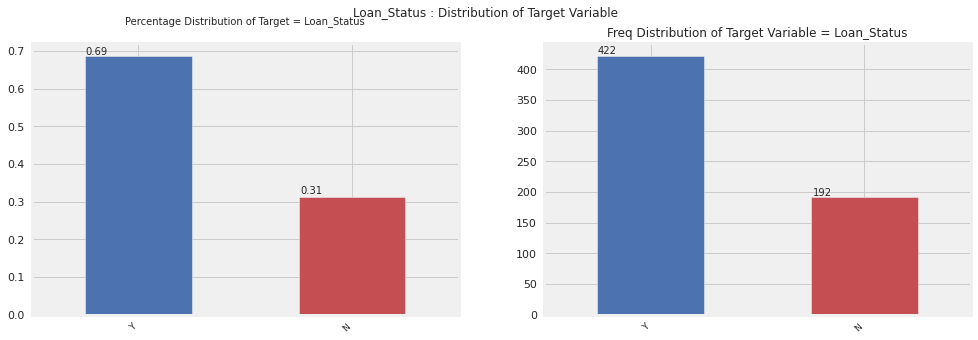

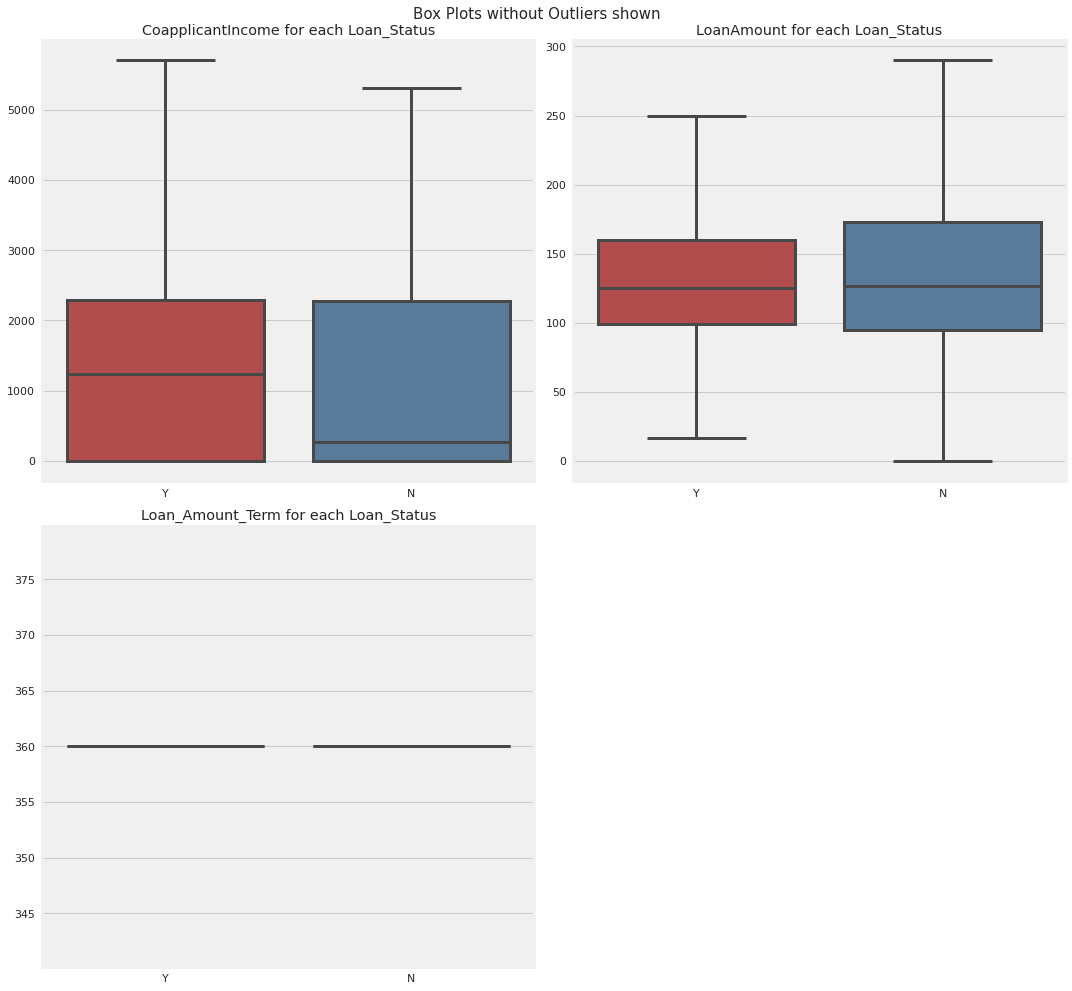

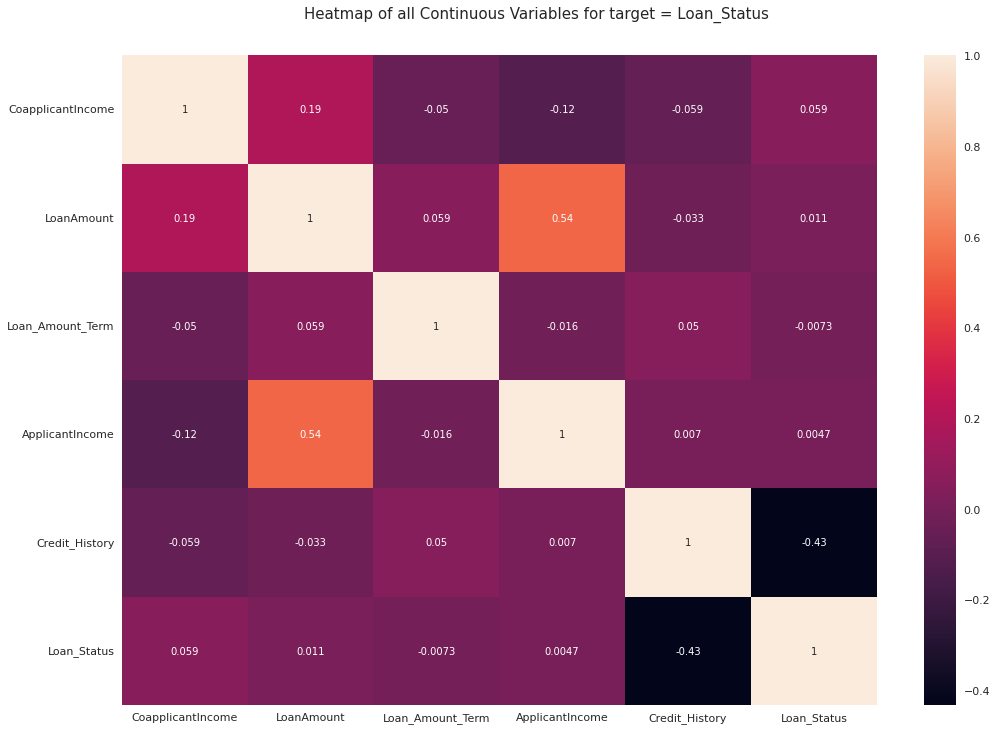

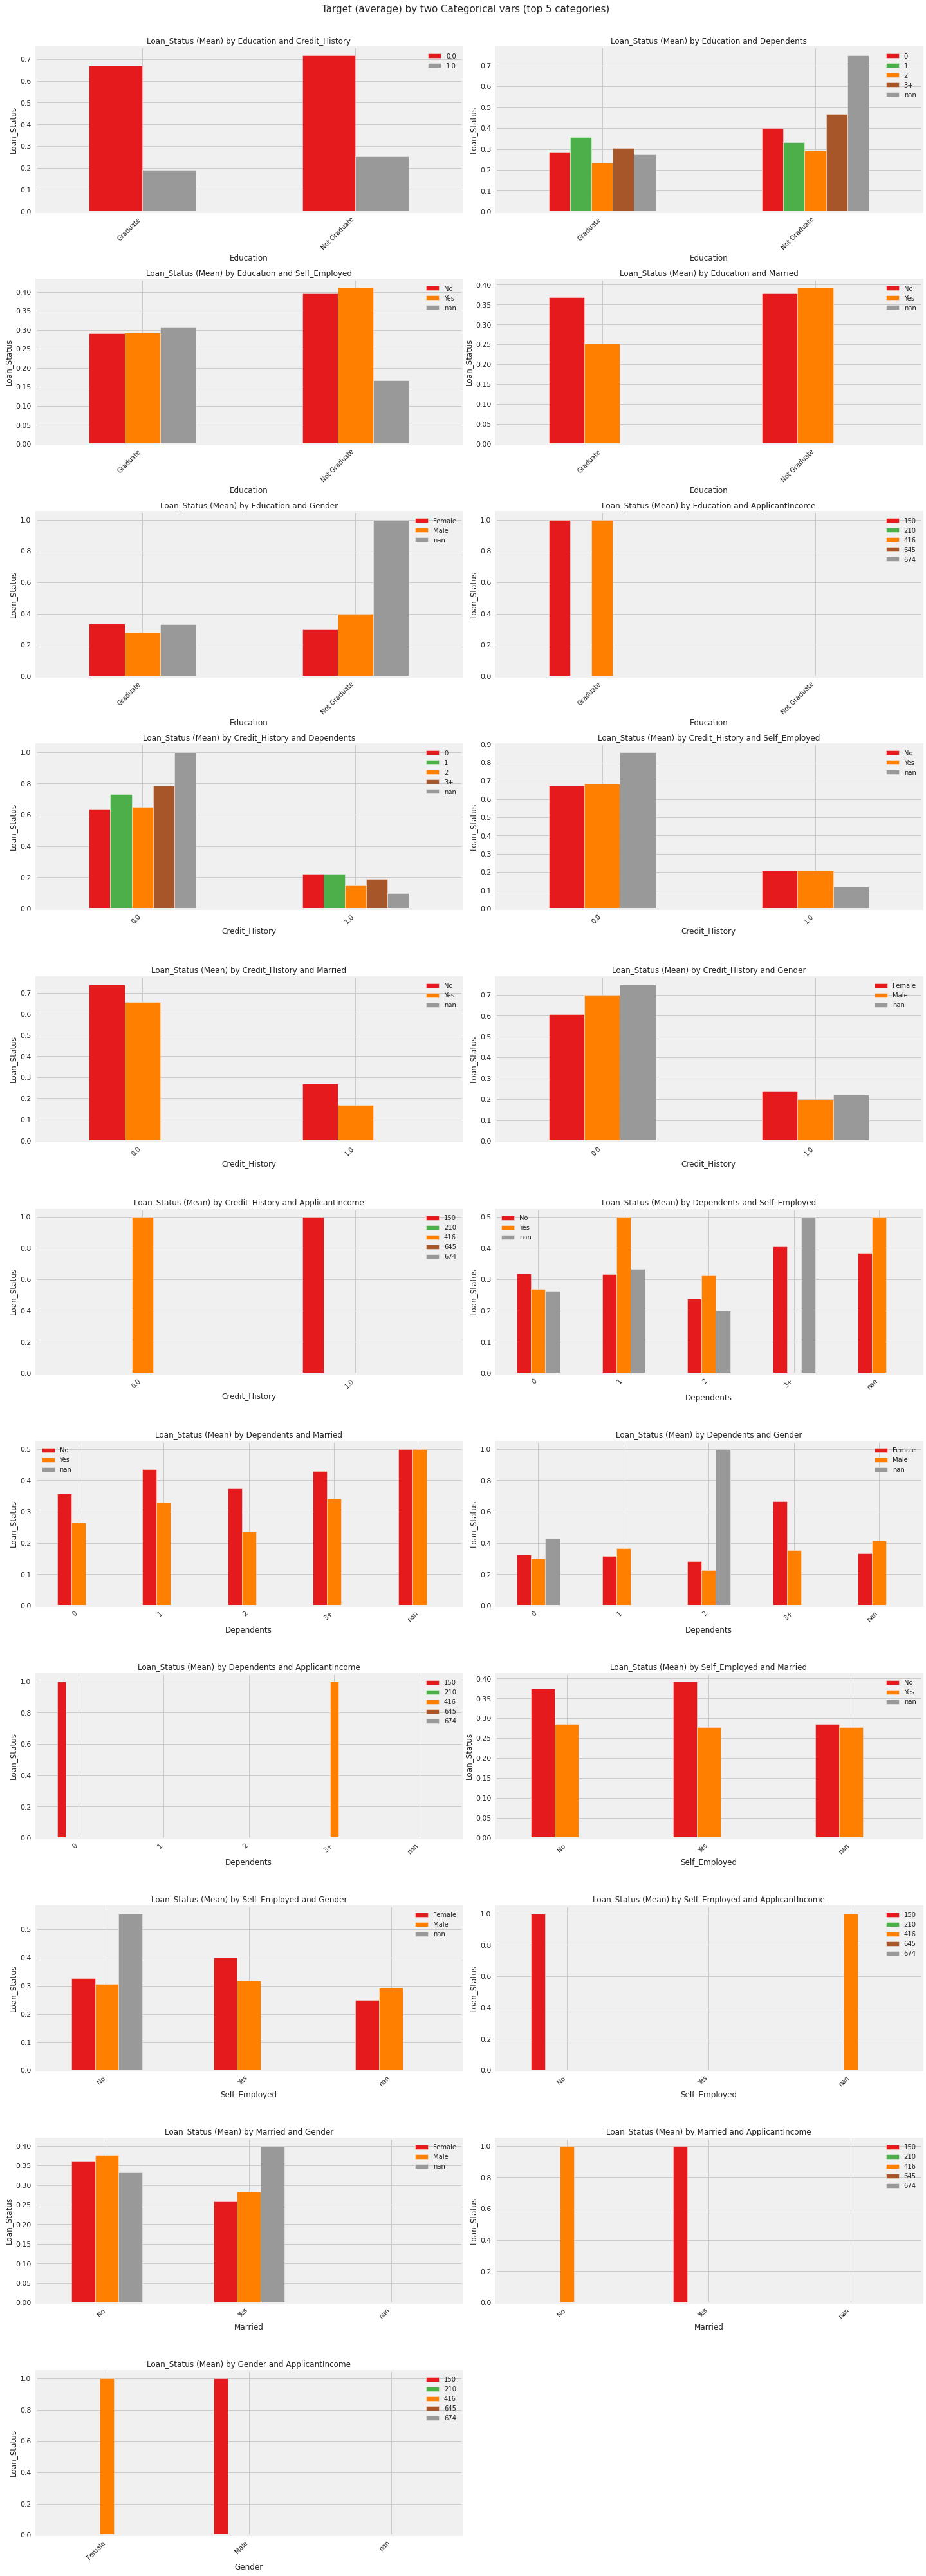

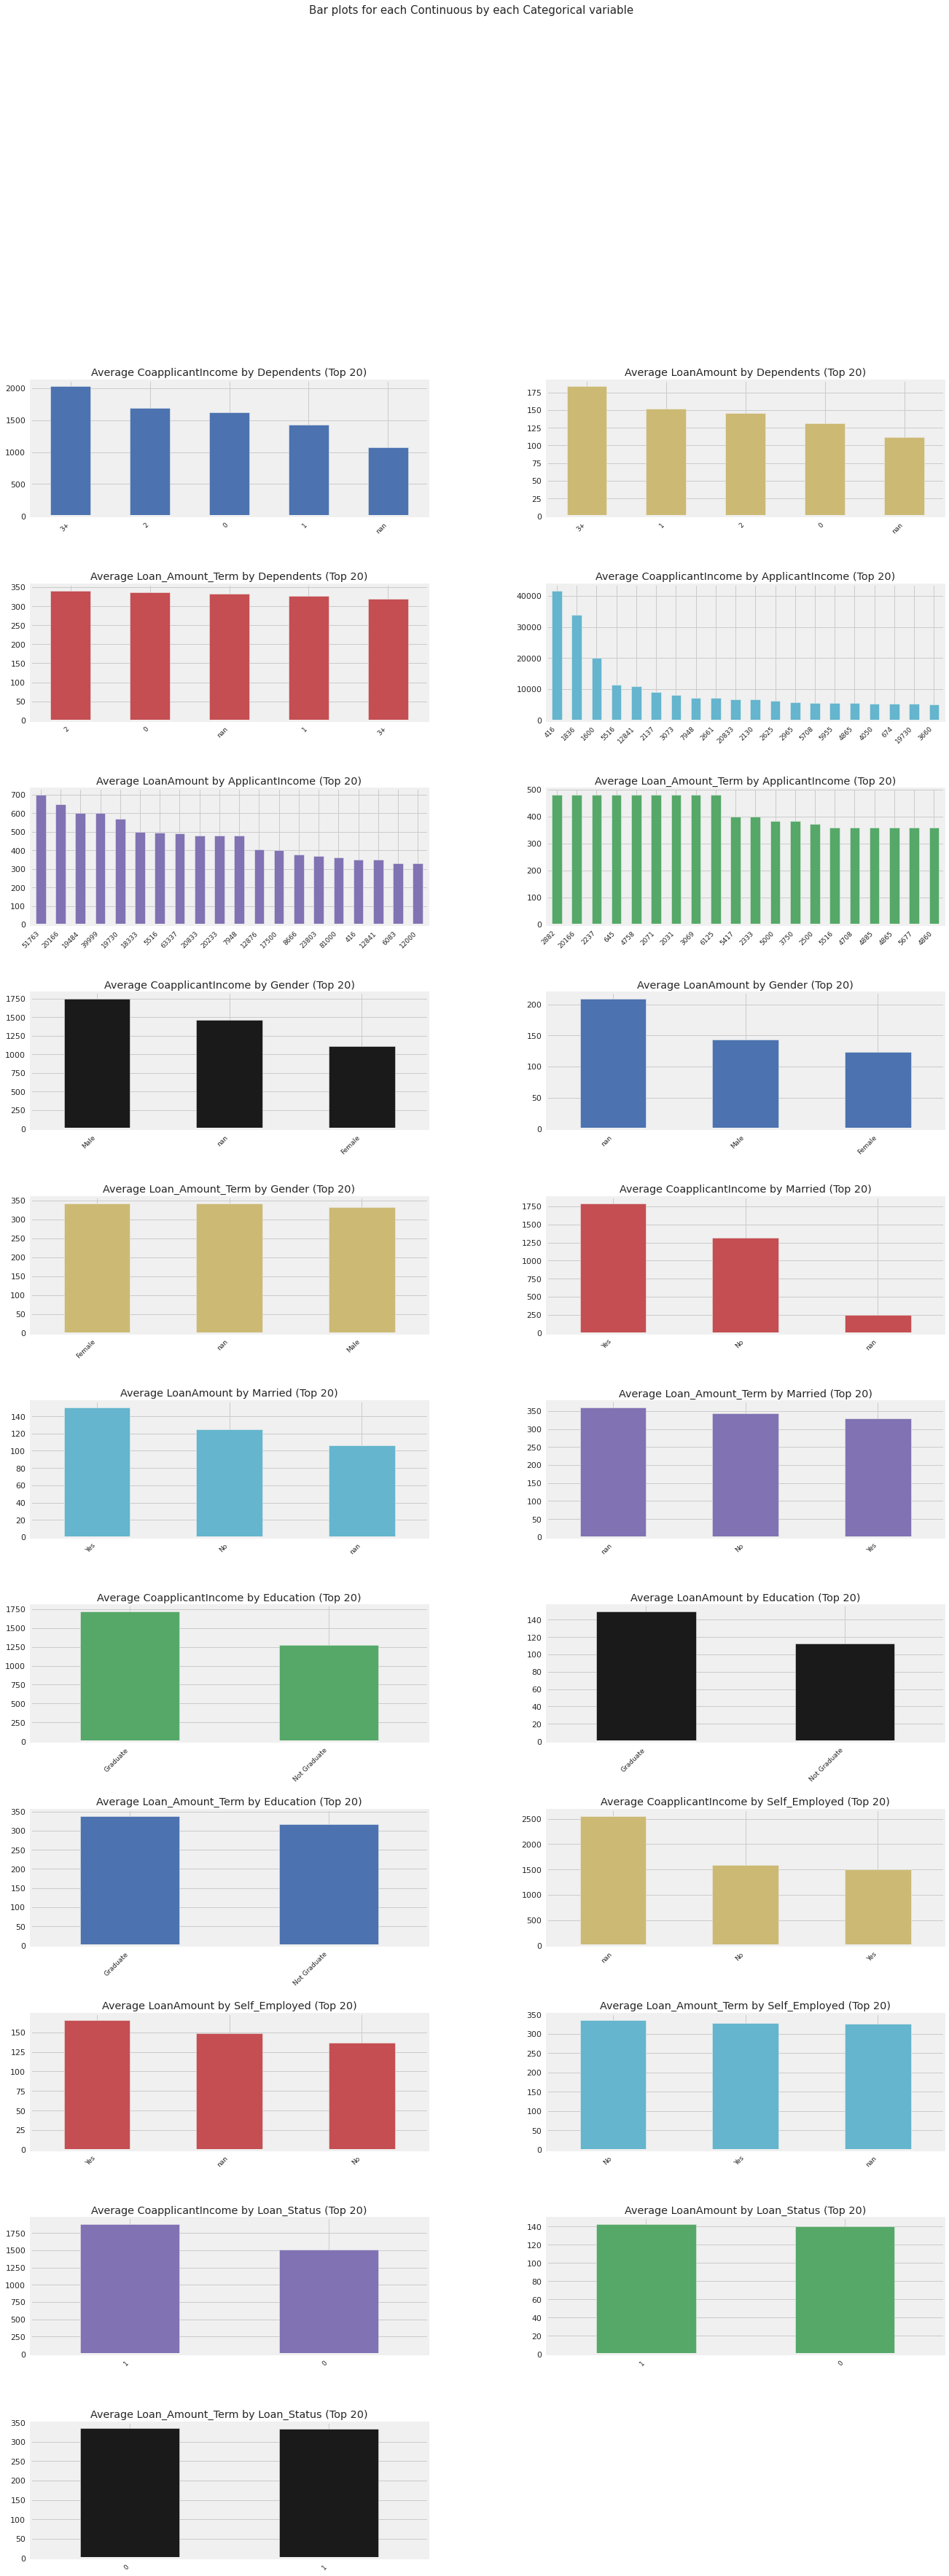

In [11]:
from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()
df = av.AutoViz(filename=None,
                depVar='Loan_Status', 
                dfte=train, 
                header=0, 
                verbose=2, 
                lowess=False, 
                chart_format='svg', 
                max_rows_analyzed=1000, 
                max_cols_analyzed=10)



In [13]:
# This method will fill the missing values and fix the outliers. 

# All fields (except perhaps the dependent variable Loan Status) needs to be label encoded as there are limited unique values
# - Gender, Married, Dependents, Education, Self_Employed, Property_Area
# Backfill missing values in these categorical fields - Gender, Married, Dependents, Self_Employed

# Backfill missing values in these numeric fields - LoanAmount, Loan_Amount_Term and Credit_History
# Values in ApplicantIncome and CoapplicantIncome to be normalized using log function

from sklearn.preprocessing import LabelEncoder


In [25]:
#Mode => filling by most occuring value
#loc => for normalizing values
#Means => in case of nulls (for the case of loans)

def clean_data(df):
  lb_make = LabelEncoder()
  [df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)]
  df['Gender'] = lb_make.fit_transform(df['Gender'])
  df['Married'].fillna(df['Married'].mode()[0], inplace=True)
  df['Married'] = lb_make.fit_transform(df['Married'])
  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
  df['Self_Employed'] = lb_make.fit_transform(df['Self_Employed'])
  df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)
  df['Property_Area'] = lb_make.fit_transform(df['Property_Area'])
  df["Dependents"].loc[df["Dependents"] == "3+"] = 3
  df["Dependents"].fillna('0', inplace=True)
  df["Dependents"] = pd.to_numeric(df["Dependents"])
  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
  # Fix skew by applying log function on the data to normalize
  df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
  df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

In [26]:
# Invoke the clean_data method on the train dataset
clean_data(train)

# Sample check the cleaned train dataset
train.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,8.674197,0.000000,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,Graduate,0,8.430327,7.319202,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,Graduate,1,8.006701,0.000000,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,Not Graduate,0,7.857094,7.765993,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,Graduate,0,8.699681,0.000000,141.000000,360.0,1.0,2,Y


In [28]:
#Check for nulls
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

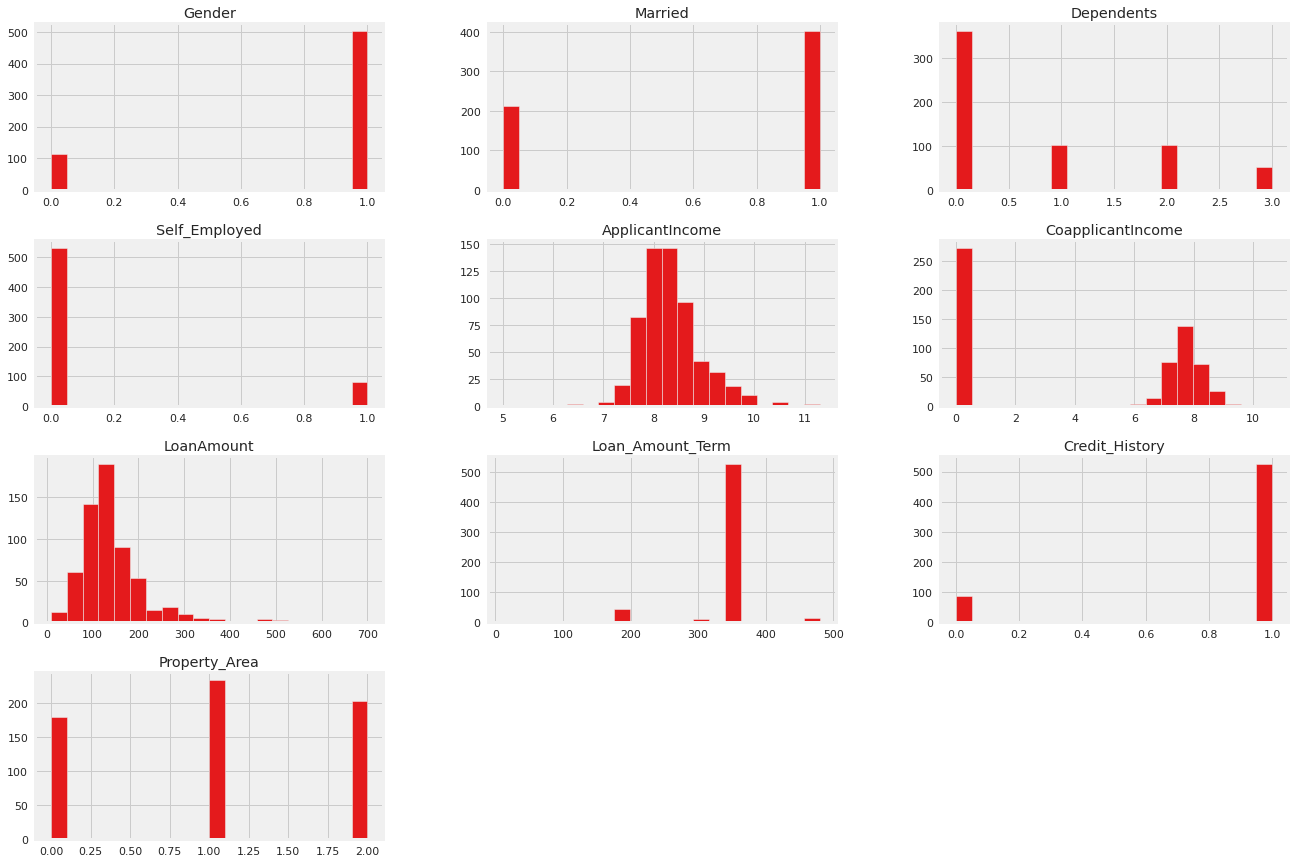

In [31]:
train.hist(bins = 20, figsize=(20,15))
plt.show()

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 62.5+ KB


In [81]:
#Isolating independent variable by dropping dependent variable
#Eliminating Loan_ID and Education (can be dropped earlier too) 
x_train = train.drop("Loan_Status", axis=1)
x_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 57.7+ KB


In [82]:
x_train = x_train.drop(columns =['Education','Loan_ID'])

In [83]:
#Isolate the dependent variable
y_train = train["Loan_Status"]
y_train.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
scaler.fit(x_train)

StandardScaler()

In [86]:
x_sscl_train = scaler.transform(x_train)
x_sscl_train

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27985054,
        -2.42876026, -0.04760721]])

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [88]:
knn.fit(x_sscl_train, y_train)

KNeighborsClassifier()

In [89]:
y_knn_pred_train = knn.predict(x_sscl_train)
y_knn_pred_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [90]:
# Check accuracy score of the train dataset
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_knn_pred_train, y_train)

0.8143322475570033

In [91]:
confusion_matrix(y_knn_pred_train, y_train)

array([[ 93,  15],
       [ 99, 407]])

In [98]:
test = test.drop(columns =['Education','Loan_ID'])


KeyError: ignored

In [99]:
clean_data(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Self_Employed      367 non-null    int64  
 4   ApplicantIncome    367 non-null    float64
 5   CoapplicantIncome  367 non-null    float64
 6   LoanAmount         367 non-null    float64
 7   Loan_Amount_Term   367 non-null    float64
 8   Credit_History     367 non-null    float64
 9   Property_Area      367 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 28.8 KB


In [100]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

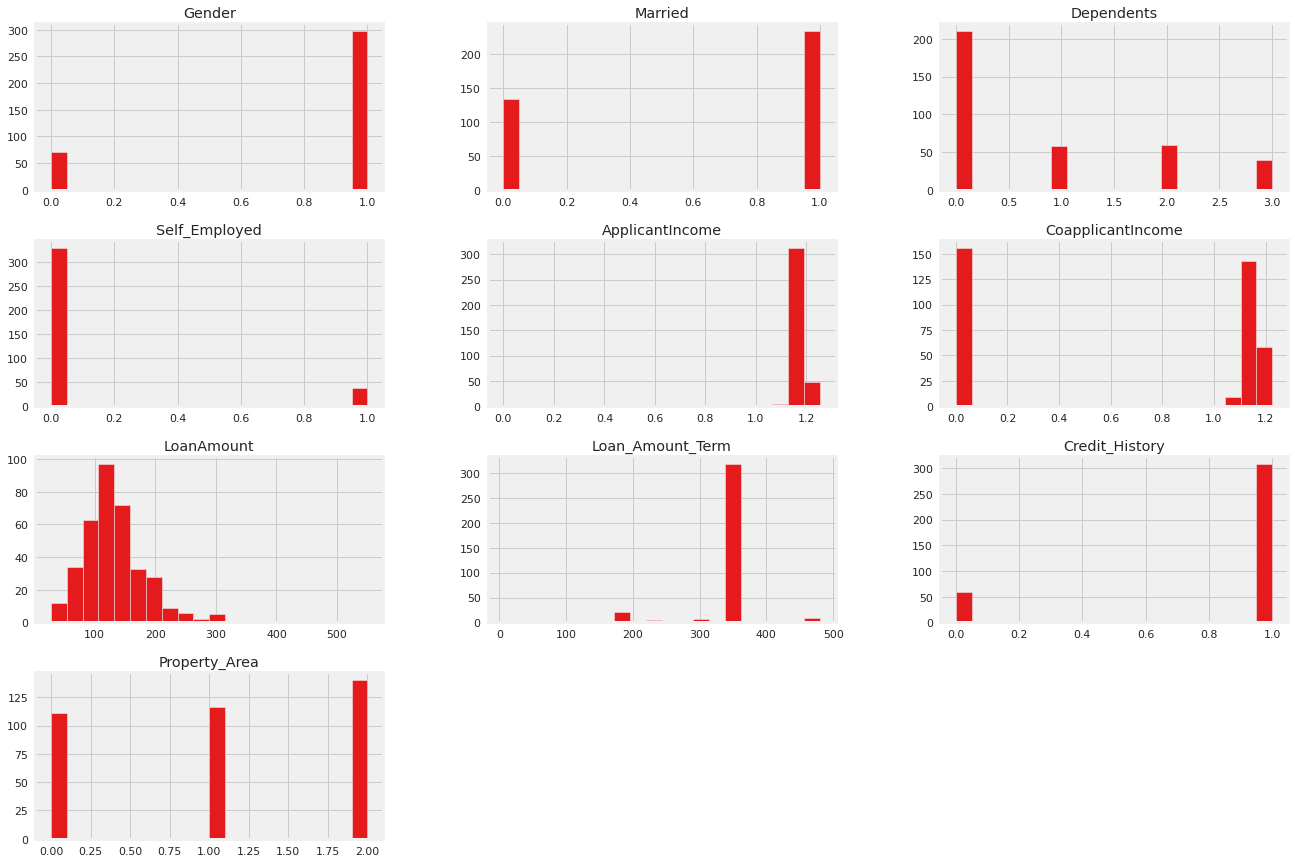

In [101]:
test.hist(bins = 20, figsize=(20,15))
plt.show()

In [102]:
scaler.fit(test)

StandardScaler()

In [103]:
x_sscl_test = scaler.transform(test)
x_sscl_test

array([[ 0.48547939,  0.75835829, -0.75822199, ...,  0.27060267,
         0.4376739 ,  1.11876379],
       [ 0.48547939,  0.75835829,  0.18187082, ...,  0.27060267,
         0.4376739 ,  1.11876379],
       [ 0.48547939,  0.75835829,  1.12196363, ...,  0.27060267,
         0.4376739 ,  1.11876379],
       ...,
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.27060267,
         0.4376739 , -0.09598861],
       [ 0.48547939,  0.75835829, -0.75822199, ...,  0.27060267,
         0.4376739 , -1.31074101],
       [ 0.48547939, -1.31863792, -0.75822199, ..., -2.51869962,
         0.4376739 , -1.31074101]])

In [104]:
y_knn_pred_test = knn.predict(x_sscl_test)
print(y_knn_pred_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

In [105]:
test["Loan_Status"] = y_knn_pred_test

In [106]:
test

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1.183919,0.000000,110.0,360.0,1.0,2,Y
1,1,1,1,0,1.163383,1.137168,126.0,360.0,1.0,2,Y
2,1,1,2,0,1.179615,1.144098,208.0,360.0,1.0,2,Y
3,1,1,2,0,1.153733,1.156752,100.0,360.0,1.0,2,Y
4,1,0,0,0,1.165551,0.000000,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1.172372,1.143615,113.0,360.0,1.0,2,Y
363,1,1,0,0,1.173584,1.106437,115.0,360.0,1.0,2,Y
364,1,0,0,0,1.165278,1.147884,126.0,360.0,1.0,1,Y
365,1,1,0,0,1.179615,1.154538,158.0,360.0,1.0,0,Y
